# Star Type Classifcation

Data set taken from [Kaggle](https://www.kaggle.com/brsdincer/star-type-classification)

![Classification of different stars](types.png)

The dataset is for the classification of different stars based on: 
* Temperature
* Relative Luminosity, L -> light emitted from surface
* Relative Radius, R -> size relative to our sun
* Absolute magnitude, A_M -> 
* Spectral Class -> O, B, A, F, G, K, M
* Color

The different types of star, the classification, are encoded to the values:
* Red Dwarf, 0
* Brown Dwarf, 1
* White Dwarf, 2
* Main Sequence, 3
* Super Giants, 4
* Hyper Giants, 5


## Loading the dataset and processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
star = pd.read_csv('Stars.csv')
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
star.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [7]:
# converting types of data
star['Temperature'] = star['Temperature'].astype(int)
star['Type'] = pd.Categorical(star.Type)
star['Color'] = pd.Categorical(star.Color)
star['Spectral_Class'] = pd.Categorical(star.Spectral_Class)

In [13]:
# checking to see if dimension reduction is needed, it is needed for color
for feat in star.columns:
    print(star[feat].value_counts())

3600     3
3218     2
2650     2
3625     2
3324     2
        ..
10980    1
13720    1
19860    1
5300     1
37882    1
Name: Temperature, Length: 228, dtype: int64
200000.00000    5
0.00067         3
0.00014         3
0.00098         3
0.00050         2
               ..
0.59000         1
0.15300         1
0.08500         1
0.35700         1
294903.00000    1
Name: L, Length: 208, dtype: int64
36.0000      3
0.1100       3
1324.0000    3
0.2400       3
83.0000      2
            ..
0.0089       1
0.0109       1
0.0087       1
0.0131       1
1783.0000    1
Name: R, Length: 216, dtype: int64
 12.23    3
 11.34    2
-10.70    2
-7.22     2
 14.23    2
         ..
 13.78    1
 12.45    1
 12.17    1
 12.13    1
-7.80     1
Name: A_M, Length: 228, dtype: int64
Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   

In [14]:
star['Color'] = star['Color'].replace(['Yellowish White','Yellowish','yellow-white','yellowish',],'Yellow')
star['Color'] = star['Color'].replace(['Blue-white','Blue White','Blue white','Blue-White'],'Blue')
star['Color'] = star['Color'].replace(['white','Whitish','White-Yellow'],'White')
star['Color'] = star['Color'].replace(['Orange-Red', 'Pale yellow orange'], 'Orange')
star['Color'].value_counts()

Red       112
Blue       97
Yellow     14
White      13
Orange      4
Name: Color, dtype: int64

In [15]:
star.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


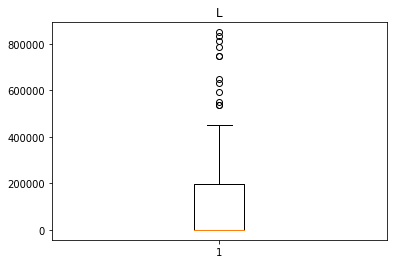

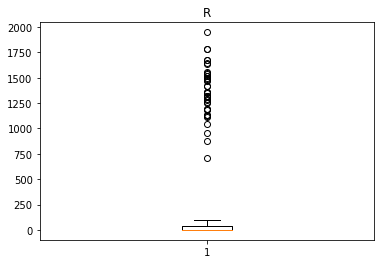

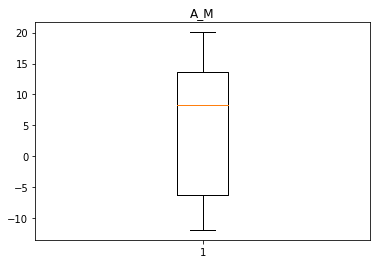

In [22]:
# see outlying data
numeric_features = ['L', 'R', 'A_M']
for feat in numeric_features:
    plt.boxplot(star[feat])
    plt.title(feat)
    plt.show()

Outliers seen in R and L, need to remove.

Number of outliers removed from L:  12


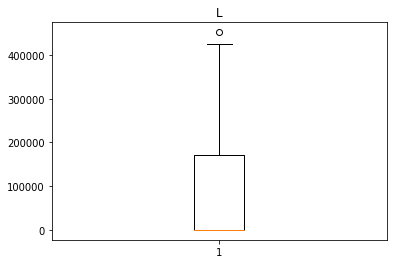

Number of outliers removed from R:  41


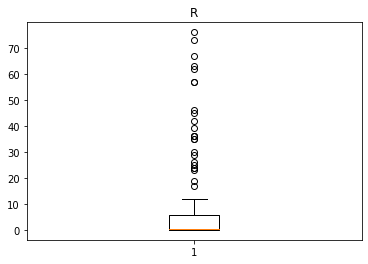

In [29]:
outliers = star[['L', 'R']]

for val in outliers:
    initial_amount = outliers[val].shape[0]
    percentile_lower = outliers[val].quantile(0.25)
    percentile_higher = outliers[val].quantile(0.75)

    iqr = percentile_higher - percentile_lower

    # finding the limits
    lower = percentile_lower - (1.5*iqr)
    higher = percentile_higher + (1.5*iqr)

    # removing outliers 
    outliers = outliers[outliers[val] < higher]
    #outliers = outliers[outliers[val] > lower]

    final_amount = outliers[val].shape[0]

    print(f'Number of outliers removed from {val}: ',initial_amount-final_amount)

    plt.boxplot(outliers[val])
    plt.title(val)
    plt.show()

In [37]:
# adding the cleaned data back to dataframe


stars_clean = pd.merge(outliers, star)
stars_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   L               187 non-null    float64 
 1   R               187 non-null    float64 
 2   Temperature     187 non-null    int64   
 3   A_M             187 non-null    float64 
 4   Color           187 non-null    category
 5   Spectral_Class  187 non-null    category
 6   Type            187 non-null    category
dtypes: category(3), float64(3), int64(1)
memory usage: 8.6 KB
